In [86]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns
import numpy as np

In [87]:
start = time.time()
df = pd.read_csv('combined_file.csv')
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")

Loading took 0.05 seconds


In [88]:
df.head(5)

,Time,System Production (W)
0,10/01/2020 00:00,0.0
1,10/01/2020 00:15,0.0
2,10/01/2020 00:30,0.0
3,10/01/2020 00:45,0.0
4,10/01/2020 01:00,0.0


In [89]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %H:%M')


In [90]:
df['minute'] = df['Time'].dt.minute
df['Hour'] = df['Time'].dt.hour
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.strftime('%B')
df = df.drop(["Time"], axis = 1)

In [91]:
df["Month"].value_counts()

Month
October      8928
December     8928
January      8928
March        8928
May          8928
November     8640
April        8640
June         8640
February     8064
July         5952
August       5952
September    5760
Name: count, dtype: int64

In [92]:
df.head(5)

,System Production (W),minute,Hour,Month,Day,Year
0,0.0,0,0,October,1,2020
1,0.0,15,0,October,1,2020
2,0.0,30,0,October,1,2020
3,0.0,45,0,October,1,2020
4,0.0,0,1,October,1,2020


In [93]:
colors = plt.cm.viridis(df['Hour'] / df['Hour'].max())

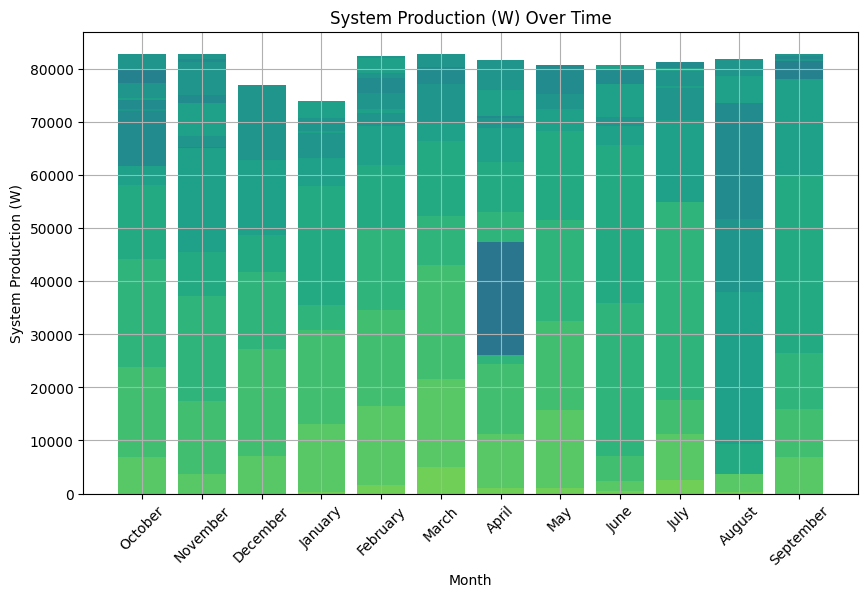

In [94]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(df['Month'], df['System Production (W)'],color=colors)
# Add labels and title
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('System Production (W)')
plt.title('System Production (W) Over Time')
# Show the plot
plt.grid(True)
plt.show()